In [32]:
import os
import pandas as pd
import warnings 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
plt.rc('font',family='AppleGothic')
# plt.rcParams('axes',unicode_minus=False)

In [4]:
path = './data_전용면적별/'

train = pd.read_csv(path+'train_new.csv')
test = pd.read_csv(path+'test_new.csv')

train.shape, test.shape

((1547, 70), (567, 68))

In [5]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '공가수', '자격유형', '임대보증금',
       '임대료', '버스정류장', '단지내주차면수', 'ERROR1', '임대건물구분_lb', '상가', '아파트', '지역_lb',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공급유형_lb', '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)',
       '국민임대', '영구임대', '임대상가', '장기전세', '행복주택', '자격유형_lb', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'ERROR1_lb',
       '나머지', '분양상가', '분양아파트', '등록차량수', '전용면적별세대수', '면적_세대수_곱', '면적_세대수_곱_총합',
       '면적_세대수_비율', '전용면적_비례_차량수'],
      dtype='object')

In [7]:
train.loc[train['임대건물구분']=='상가',['단지코드','임대건물구분','전용면적별세대수', '전용면적_비례_차량수']]

,단지코드,임대건물구분,전용면적별세대수,전용면적_비례_차량수
3,C1004,상가,1,0.064091
4,C1004,상가,1,0.086980
5,C1004,상가,1,0.086980
6,C1004,상가,2,0.192272
7,C1004,상가,1,0.100714
...,...,...,...,...
1450,C2621,상가,8,0.858601
1451,C2621,상가,1,0.218112
1452,C2621,상가,1,0.474308
1466,C2644,상가,1,0.346027


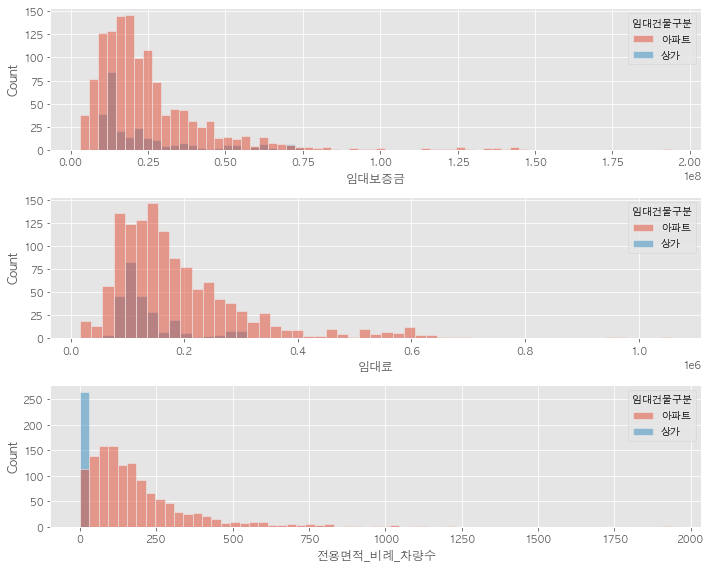

In [21]:
plt.style.use('ggplot')

# train[['임대보증금']].plot.hist(color='임대건물구분')
plt.figure(figsize=(10,8))
plt.subplot(311)
sns.histplot(x='임대보증금', hue='임대건물구분', data=train)
plt.subplot(312)
sns.histplot(x='임대료', hue='임대건물구분', data=train)
plt.subplot(313)
sns.histplot(x='전용면적_비례_차량수', hue='임대건물구분', data=train)

plt.tight_layout()

<AxesSubplot:xlabel='총세대수', ylabel='Count'>

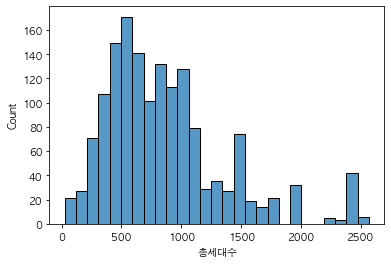

In [20]:
sns.histplot(x='총세대수', data=train)

<AxesSubplot:xlabel='임대보증금', ylabel='Count'>

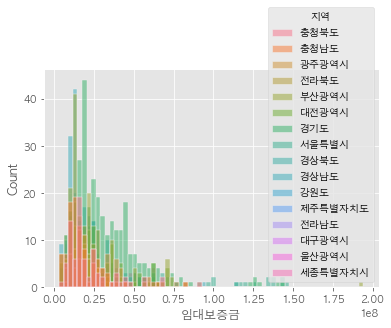

In [31]:
sns.histplot(x='임대보증금',data=train, hue='지역')

# train[['임대보증금']].plot.hist(subplots=True)

<AxesSubplot:xlabel='지역', ylabel='임대보증금'>

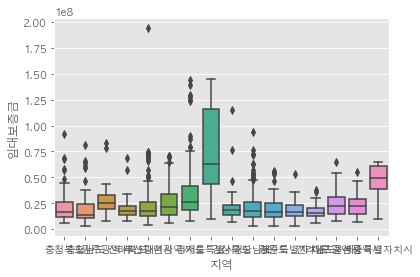

In [23]:
sns.boxplot(x='지역',y='임대보증금', data=train)

## 지역 전처리

In [120]:
path = '../data/'

train = pd.read_csv(path+'4_train.csv')
test = pd.read_csv(path+'4_test.csv')

train.shape, test.shape

((2952, 73), (1008, 72))

In [121]:
train.head(2)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,나머지,분양상가,분양아파트,등록차량수,총세대수_lb,총세대수_lb_A1,총세대수_lb_B1,총세대수_lb_C1,총세대수_lb_D1,총세대수_lb_E1
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,...,1,0,0,1015.0,D1,0,0,0,1,0
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,...,1,0,0,1015.0,D1,0,0,0,1,0


In [122]:
def df_new(df):
    
    # 전용면적의 소수점 없애기
    df['전용면적'] = df['전용면적'].apply(int)
    
    # 겹치는 전용면족 행 병합(결측치 없는 피처로 구분)
    cols = list(df.columns)
    cols.remove('전용면적별세대수')
    cols.remove('지하철')
    df_new = df.groupby(cols, as_index=False).agg({'전용면적별세대수': 'sum'})
    
    # 각 전용면적과 그에 상응하는 세대수의 곱
    df_new['면적_세대수_곱']  = df_new['전용면적'] * df_new['전용면적별세대수']
    
    # 각 단지코드당 계산된 실제 총 세대수
    df_new['면적_세대수_곱_총합'] = df_new['면적_세대수_곱'].groupby(df_new['단지코드']).transform('sum')
    
    # 비율 계산
    df_new['면적_세대수_비율'] = df_new['면적_세대수_곱']/df_new['면적_세대수_곱_총합']
    
    # 전용면적_비례_차량수
    try :
        df_new['전용면적_비례_차량수'] = df_new.apply(lambda row: (row['면적_세대수_비율'] * row['등록차량수']), axis=1)
    except :
        return df_new
    
    return df_new
                                         
train_new = df_new(train)
test_new = df_new(test)

print(train.shape, test.shape)
print(train_new.shape, test_new.shape)

(2952, 73) (1008, 72)
(1262, 76) (461, 74)


In [123]:
order_list = train_new.groupby("지역")['전용면적_비례_차량수'].median().sort_values().index.tolist()
order_list
# train_new.groupby("지역")['전용면적_비례_차량수'].median().sort_values()
# train_new.groupby("지역")['전용면적_비례_차량수'].mean().sort_values()

['충청남도',
 '강원도',
 '제주특별자치도',
 '경상남도',
 '울산광역시',
 '서울특별시',
 '부산광역시',
 '대전광역시',
 '전라북도',
 '경상북도',
 '전라남도',
 '경기도',
 '충청북도',
 '광주광역시',
 '세종특별자치시',
 '대구광역시']

<AxesSubplot:xlabel='전용면적_비례_차량수', ylabel='지역'>

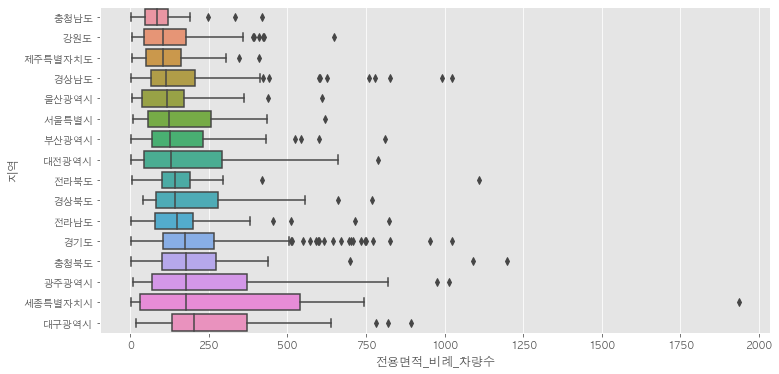

In [124]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_new, y='지역', x='전용면적_비례_차량수', order=order_list)

{0: '강원도', 1: '경기도', 2: '경상남도', 3: '경상북도', 4: '광주광역시', 5: '대구광역시', 6: '대전광역시', 7: '부산광역시', 8: '서울특별시', 9: '세종특별자치시', 10: '울산광역시', 11: '전라남도', 12: '전라북도', 13: '제주특별자치도', 14: '충청남도', 15: '충청북도'}

In [125]:
city_grp1 = ['충청남도','강원도', '제주특별자치도']
city_grp2 = ['경상남도','울산광역시','서울특별시', '부산광역시', '대전광역시', '전라북도', '경상북도', '전라남도', '경기도', '충청북도']
city_grp3 = ['광주광역시','세종특별자치시','대구광역시']

def city_cat(row):
    if row in city_grp1 :
        return 'low'
    elif row in city_grp2 :
        return 'mid'
    elif row in city_grp3 :
        return 'high'
    else:
        return np.nan

train_new['지역_cat'] = train_new['지역'].apply(city_cat)
print(train_new['지역_cat'].dtype)
train_new.head()

object


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,공가수,자격유형,임대보증금,임대료,...,총세대수_lb_B1,총세대수_lb_C1,총세대수_lb_D1,총세대수_lb_E1,전용면적별세대수,면적_세대수_곱,면적_세대수_곱_총합,면적_세대수_비율,전용면적_비례_차량수,지역_cat
0,C1000,566,아파트,충청북도,국민임대,39,10.0,A,10803000.0,96030.0,...,0,0,1,0,419,16341,23478,0.696013,334.782392,mid
1,C1000,566,아파트,충청북도,국민임대,46,10.0,A,14404000.0,129640.0,...,0,0,1,0,72,3312,23478,0.141068,67.853821,mid
2,C1000,566,아파트,충청북도,국민임대,51,10.0,A,15604000.0,150040.0,...,0,0,1,0,75,3825,23478,0.162918,78.363787,mid
3,C1004,521,아파트,충청남도,영구임대,39,3.0,C,4682000.0,104180.0,...,0,0,1,0,240,9360,19656,0.476190,44.285714,low
4,C1004,521,아파트,충청남도,영구임대,39,3.0,C,4728000.0,105210.0,...,0,0,1,0,264,10296,19656,0.523810,48.714286,low


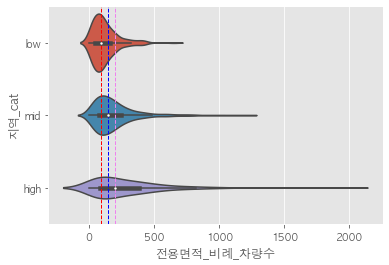

In [126]:
sns.violinplot(data=train_new, y='지역_cat', x='전용면적_비례_차량수', order=['low','mid','high'])
grp = train_new.groupby("지역_cat")
plt.axvline(grp.get_group(('low'))['전용면적_비례_차량수'].median(), c='r', ls='--', lw=1)
plt.axvline(grp.get_group(('mid'))['전용면적_비례_차량수'].median(), c='b', ls='--', lw=1)
plt.axvline(grp.get_group(('high'))['전용면적_비례_차량수'].median(), c='violet', ls='--', lw=1)


In [224]:
path = '../data/'

train = pd.read_csv(path+'4_train.csv')
test = pd.read_csv(path+'4_test.csv')

train.shape, test.shape

((2952, 73), (1008, 72))

## 전용면적 범주화

<AxesSubplot:>

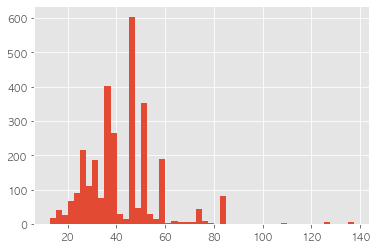

In [225]:
train.loc[train['전용면적']<150,'전용면적'].hist(bins=50) # 전용면적 상한 100, 하한 15

In [226]:
# train과 test 셋 합치기
print(train.shape, test.shape)
all_df = pd.concat([train.drop("등록차량수",axis=1), test])
print(all_df.shape)

(2952, 73) (1008, 72)
(3960, 72)


35.0     926
45.0     837
50.0     516
25.0     445
30.0     297
55.0     266
20.0     214
15.0     148
80.0      94
100.0     72
70.0      56
40.0      56
75.0      14
60.0      10
65.0       9
Name: 전용면적_5, dtype: int64


<AxesSubplot:xlabel='전용면적_5', ylabel='count'>

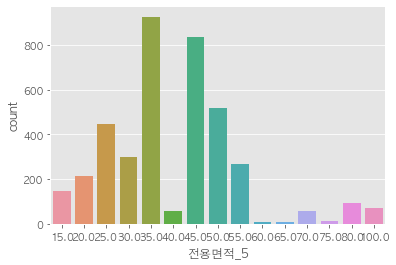

In [227]:
# 전용면적 상/하한 적용
all_df['전용면적_5'] = all_df['전용면적']//5*5
idx = all_df[all_df['전용면적']>100].index
all_df.loc[idx, '전용면적_5'] = 100

idx = all_df[all_df['전용면적']<15].index
all_df.loc[idx, '전용면적_5'] = 15

print(all_df['전용면적_5'].value_counts())
sns.countplot(all_df['전용면적_5'],order=np.sort(all_df['전용면적_5'].unique()))

In [191]:
from sklearn.preprocessing import OneHotEncoder

# 원핫인코더
oh_encoder = OneHotEncoder()
ohs = oh_encoder.fit_transform(all_df['전용면적_5'].to_numpy().reshape(-1,1)).toarray()
print(ohs.shape)

# 원핫인코딩 DF 만들기 및 컬럼명 지정
ohs_df = pd.DataFrame(ohs)
ohs_df.columns = ["전용면적_"+str(i) for i in np.sort(all_df['전용면적_5'].unique())]
ohs_df = ohs_df.astype(int)
print(ohs_df.sum())
ohs_df.head()

# 35     926
# 45     837
# 50     516
# 25     445
# 30     297
# 55     266
# 20     214
# 15     148
# 80      94
# 100     72
# 70      56
# 40      56
# 75      14
# 60      10
# 65       9

(3960, 15)
전용면적_15     148
전용면적_20     214
전용면적_25     445
전용면적_30     297
전용면적_35     926
전용면적_40      56
전용면적_45     837
전용면적_50     516
전용면적_55     266
전용면적_60      10
전용면적_65       9
전용면적_70      56
전용면적_75      14
전용면적_80      94
전용면적_100     72
dtype: int64


,전용면적_15,전용면적_20,전용면적_25,전용면적_30,전용면적_35,전용면적_40,전용면적_45,전용면적_50,전용면적_55,전용면적_60,전용면적_65,전용면적_70,전용면적_75,전용면적_80,전용면적_100
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [228]:
all_df.reset_index(inplace=True)

In [229]:
ohs_df
# all_df

,전용면적_15,전용면적_20,전용면적_25,전용면적_30,전용면적_35,전용면적_40,전용면적_45,전용면적_50,전용면적_55,전용면적_60,전용면적_65,전용면적_70,전용면적_75,전용면적_80,전용면적_100
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3956,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3957,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3958,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [239]:
all_df = pd.concat([all_df, ohs_df], axis=1)
all_df

,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,...,전용면적_40,전용면적_45,전용면적_50,전용면적_55,전용면적_60,전용면적_65,전용면적_70,전용면적_75,전용면적_80,전용면적_100
0,0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,...,0,0,0,0,0,0,0,0,0,0
1,1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,...,0,0,0,0,0,0,0,0,0,0
2,2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,...,0,0,1,0,0,0,0,0,0,0
3,3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,...,0,0,1,0,0,0,0,0,0,0
4,4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,1003,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,...,0,0,0,0,0,0,0,0,0,0
3956,1004,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,...,0,0,0,0,0,0,0,0,0,0
3957,1005,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,...,0,0,0,0,0,0,0,0,0,0
3958,1006,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,...,0,0,0,0,0,0,0,0,0,0


## 지역 범주화


In [241]:
city_grp1 = ['충청남도','강원도', '제주특별자치도']
city_grp2 = ['경상남도','울산광역시','서울특별시', '부산광역시', '대전광역시', '전라북도', '경상북도', '전라남도', '경기도', '충청북도']
city_grp3 = ['광주광역시','세종특별자치시','대구광역시']

def city_cat(row):
    if row in city_grp1 :
        return 'low'
    elif row in city_grp2 :
        return 'mid'
    elif row in city_grp3 :
        return 'high'
    else:
        return np.nan

all_df['지역_cat'] = all_df['지역'].apply(city_cat)
print(all_df['지역_cat'].dtype)
all_df.head()

object


,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,...,전용면적_45,전용면적_50,전용면적_55,전용면적_60,전용면적_65,전용면적_70,전용면적_75,전용면적_80,전용면적_100,지역_cat
0,0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,...,0,0,0,0,0,0,0,0,0,mid
1,1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,...,0,0,0,0,0,0,0,0,0,mid
2,2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,...,0,1,0,0,0,0,0,0,0,mid
3,3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,...,0,1,0,0,0,0,0,0,0,mid
4,4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,...,0,1,0,0,0,0,0,0,0,mid


## train셋과 test 셋 분리

In [247]:
print(train.shape, test.shape)
all_df.drop('index', axis=1, inplace=True)
train_new = all_df.iloc[:2952,:]
train_new['등록차량수'] = train['등록차량수']
test_new = all_df.iloc[2952:, :]

print(train_new.shape, test_new.shape)

(2952, 73) (1008, 72)
(2952, 90) (1008, 89)


In [248]:
def df_new(df):
    
    # 전용면적의 소수점 없애기
    df['전용면적'] = df['전용면적'].apply(int)
    
    # 겹치는 전용면족 행 병합(결측치 없는 피처로 구분)
    cols = list(df.columns)
    cols.remove('전용면적별세대수')
    cols.remove('지하철')
    df_new = df.groupby(cols, as_index=False).agg({'전용면적별세대수': 'sum'})
    
    # 각 전용면적과 그에 상응하는 세대수의 곱
    df_new['면적_세대수_곱']  = df_new['전용면적'] * df_new['전용면적별세대수']
    
    # 각 단지코드당 계산된 실제 총 세대수
    df_new['면적_세대수_곱_총합'] = df_new['면적_세대수_곱'].groupby(df_new['단지코드']).transform('sum')
    
    # 비율 계산
    df_new['면적_세대수_비율'] = df_new['면적_세대수_곱']/df_new['면적_세대수_곱_총합']
    
    # 전용면적_비례_차량수
    try :
        df_new['전용면적_비례_차량수'] = df_new.apply(lambda row: (row['면적_세대수_비율'] * row['등록차량수']), axis=1)
    except :
        return df_new
    
    return df_new

print(train_new.shape, test_new.shape)

train_new = df_new(train_new)
test_new = df_new(test_new)

print(train_new.shape, test_new.shape)

(2952, 90) (1008, 89)
(1267, 93) (478, 91)
